# 🌍 Decoding Happiness: an analysis of global happiness trends in 2019

## 📌 Overview  
This mini-project explores global happiness trends in 2019, using data on happiness scores and their relationship with key socio-economic factors. The dataset includes numerical metrics for each country, along with categorical information such as country names and continents (which I later joined to the dataset).  

## 📊 Dataset Features  
The dataset contains the following columns:  
- Overall Rank (int, discrete)
- Country Name (string, discrete)  
- Happiness Score (float, continuous)
- GDP per Capita float, continuous
- Social Support (float, continuous)
- Healthy Life Expectancy (float, continuous)
- Freedom to Make Life Choices (float, continuous)
- Generosity (float, continuous)
- Perceptions of Corruption (float, continuous)
- *[subsequently added]* Continent (string, discrete)


---


## 🎯 Project Goals  
This project was intended to learn the fundamentals of:  
- **Pandas** 🐼 → For data parsing, manipulation, and cleaning  
- **Matplotlib** 📊 → For visualising trends and distributions  
- **Scikit-learn** 🤖 → For building simple **machine learning models** to make predictions  

I approached this analysis through a set of **exploratory** and **predictive** research questions, listed below  


---


## 🔍 Exploratory Data Analysis (EDA)  
*Descriptive insights into happiness scores and their influencing factors.*

1️⃣ Which country had the highest and lowest happiness scores in 2019?

2️⃣ What is the average happiness score across all countries?

3️⃣ Which factors have the highest correlation with happiness score?

4️⃣ Which continent has the highest average happiness score?

5️⃣ Which countries have the highest and lowest social support?

6️⃣ How does GDP per capita vary across countries?

7️⃣ Is there a relationship between corruption perception and happiness?

8️⃣ Which country has the highest combination of GDP per capita and social support?

9️⃣ Which two factors combined have the strongest correlation with happiness score?

🔟 Does the impact of GDP on happiness differ between high-social-support and low-social-support countries?

1️⃣1️⃣ Does generosity play a larger role in happiness in wealthier or poorer countries?

1️⃣2️⃣ Do countries with high corruption perception have lower happiness scores, even if they have high GDP per capita?  


---


## 🤖 Predictive Analysis  
*Building models to understand key drivers of happiness.*

1️⃣ Can we predict whether a country is above or below the median happiness score? 

2️⃣ What's the best single predictor of a country's happiness score?

3️⃣ Can we predict a country's continent based on its data?






In [286]:
import pandas as pd

# import the .csv file containing the world happiness data

world_happiness_2019 = pd.read_csv('data/2019.csv')

# inspect its contents - column names and data types 

world_happiness_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


**Exploratory Data Analysis**

1️⃣ Which country had the highest and lowest happiness scores in 2019?

In [287]:
# find country with the highest happiness score in the dataset 

highest_happiness_score = world_happiness_2019[world_happiness_2019['Score'] == world_happiness_2019['Score'].max()]


# find country with the lowest happiness score in the dataset 

lowest_happiness_score = world_happiness_2019[world_happiness_2019['Score'] == world_happiness_2019['Score'].min()]

display(highest_happiness_score)
display(lowest_happiness_score)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
155,156,South Sudan,2.853,0.306,0.575,0.295,0.01,0.202,0.091


2️⃣ What is the average happiness score across all countries?

In [288]:
# unclear what is intended by 'average' here, so producing a selection...

# generate summary statistics from the score column of dataset

happiness_score_summary_stats = world_happiness_2019['Score'].describe()

# noticed that mode wasn't included in the output for .describe() so adding it here

most_frequent_happiness_score = world_happiness_2019['Score'].mode()

# display averages 

print("Here are the summary statistics for the happiness scores recorded in the dataset:\n", happiness_score_summary_stats)

print(f"The mean happiness score across all countries in 2019 was {happiness_score_summary_stats['mean']:.2f}")
print(f"The median happiness score in 2019 was {happiness_score_summary_stats['mean']:.2f}")
print(f"The mode happiness score in 2019 was {most_frequent_happiness_score[0]:.2f}")

Here are the summary statistics for the happiness scores recorded in the dataset:
 count    156.000000
mean       5.407096
std        1.113120
min        2.853000
25%        4.544500
50%        5.379500
75%        6.184500
max        7.769000
Name: Score, dtype: float64
The mean happiness score across all countries in 2019 was 5.41
The median happiness score in 2019 was 5.41
The mode happiness score in 2019 was 5.21


3️⃣ Which factors have the highest correlation with happiness score?

In [289]:
# remove non-numeric data from the dataset

world_happiness_2019_numerical_data = world_happiness_2019.iloc[:, [0,2,3,4,5,6,7,8]]

# create correlation matrix for the whole dataset

correllation_matrix = world_happiness_2019_numerical_data.corr()
display(correllation_matrix)

# narrow it down: create correlation matrix just for 'Score' column

happiness_score_correlations = correllation_matrix['Score']
display(happiness_score_correlations)

# sort the happiness score correllations with highest first

ranked_happiness_score_correlations = happiness_score_correlations.sort_values(ascending=False)

# display insights

print(f"""
      The factors that have the highest correllation with happiness score are: 
      GDP per capita ({happiness_score_correlations['GDP per capita']:.3f})
      Healthy life expectancy ({happiness_score_correlations['Healthy life expectancy']:.3f})
      Social support ({happiness_score_correlations['Social support']:.3f})")
      """)




,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


Overall rank                   -0.989096
Score                           1.000000
GDP per capita                  0.793883
Social support                  0.777058
Healthy life expectancy         0.779883
Freedom to make life choices    0.566742
Generosity                      0.075824
Perceptions of corruption       0.385613
Name: Score, dtype: float64


      The factors that have the highest correllation with happiness score are: 
      GDP per capita (0.794)
      Healthy life expectancy (0.780)
      Social support (0.777)")
      


In [290]:
# import new .csv file containing countries and their continents

continents = pd.read_csv('data/countries_and_continents.csv')

continents.set_index('Country', inplace=True)

display(continents.head())

# join the two datasets with on Country name

merged_df = world_happiness_2019.set_index('Country or region').join(continents, how='left', lsuffix='_')

print(f"Total rows before cleaning: {len(merged_df)}")


print(len(merged_df))

# check for null values after merging datasets

print(merged_df.isna().sum())
# returning 5

# given relatively small number of nulls, dropping affected rows
merged_df.dropna(inplace=True)

print(f"Total rows after cleaning: {len(merged_df)}")

merged_df.reset_index(inplace=True)

# group the new dataset by continent name

grouped_by_continent = merged_df.groupby('Continent')

# calculate the mean happiness score for each continent

average_happiness_scores = grouped_by_continent['Score'].mean()

# display average happiness scores for each continent
print(average_happiness_scores)

# find continent with highest average happeiness score
happiest_continent = average_happiness_scores[average_happiness_scores == average_happiness_scores.max()]

# display result
print(f"Happiest Continent: \n{happiest_continent}")

,Continent
Country,
Finland,Europe
Denmark,Europe
Norway,Europe
Iceland,Europe
Netherlands,Europe


Total rows before cleaning: 156
156
Overall rank                    0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Continent                       5
dtype: int64
Total rows after cleaning: 151
Continent
Africa           4.333750
Asia             5.260500
Europe           6.212707
North America    6.154692
Oceania          6.807667
South America    5.920200
Name: Score, dtype: float64
Happiest Continent: 
Continent
Oceania    6.807667
Name: Score, dtype: float64


5️⃣ Which countries have the highest and lowest social support?



In [291]:
# find country with highest social support score

highest_social_support_score = world_happiness_2019[world_happiness_2019['Social support'] == world_happiness_2019['Social support'].max()]

# find country with lowest social support score

lowest_social_support_score = world_happiness_2019[world_happiness_2019['Social support'] == world_happiness_2019['Social support'].min()]

# display results

print("Country with the highest social support score is:")
display(highest_social_support_score)
print("\nCountry with the lowest social support score is:")
display(lowest_social_support_score)

Country with the highest social support score is:


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
3,4,Iceland,7.494,1.38,1.624,1.026,0.591,0.354,0.118



Country with the lowest social support score is:


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
154,155,Central African Republic,3.083,0.026,0.0,0.105,0.225,0.235,0.035


6️⃣ How does GDP per capita vary across countries?

Continent
Oceania          1.265000
Europe           1.205293
South America    0.982700
Asia             0.967125
North America    0.952385
Africa           0.484341
Name: GDP per capita, dtype: float64
GDP per capita statistics:
Mean: 0.90
Variance: 0.16
Standard Deviation: 0.40


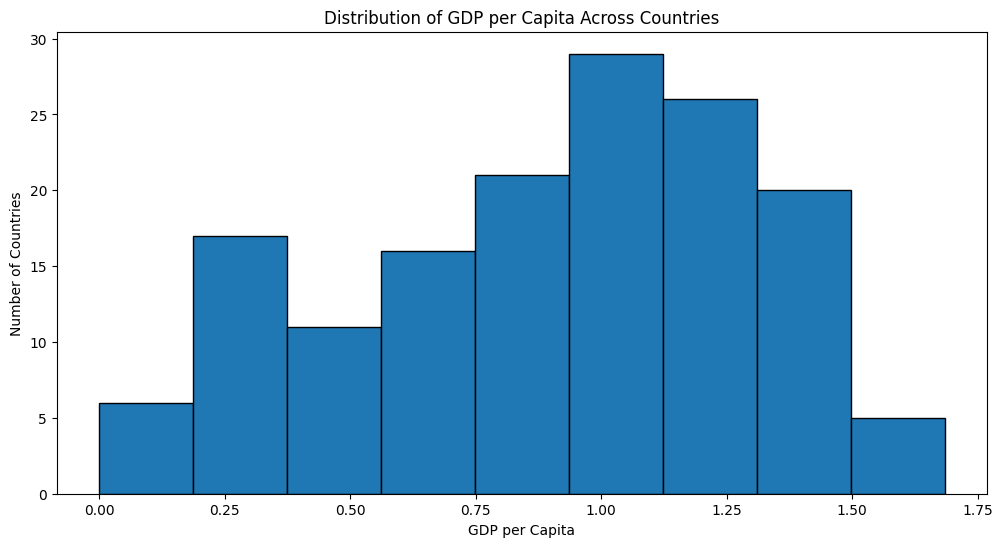

In [292]:
import matplotlib.pyplot as plt

# filter dataset to include only relevant columns

gdp_per_capita_across_countries = merged_df[['Country or region', 'GDP per capita', 'Continent']]

# sort data by GDP per capita 

sorted_df = gdp_per_capita_across_countries.sort_values(by="GDP per capita", ascending=False)


# calculate average GDP per capita by continent

print(gdp_per_capita_across_countries.groupby('Continent')['GDP per capita'].mean().sort_values(ascending=False))


# calculate summary stats on GDP per capita

mean_of_gdp_per_capita = sorted_df['GDP per capita'].mean()
std_of_gdp_per_capita = sorted_df['GDP per capita'].std()
variance_of_gdp_per_capita = sorted_df['GDP per capita'].var()


# display summary stats on GDP per capita

print(f"GDP per capita statistics:")
print(f"Mean: {mean_of_gdp_per_capita:.2f}")
print(f"Variance: {variance_of_gdp_per_capita:.2f}")
print(f"Standard Deviation: {std_of_gdp_per_capita:.2f}")

# visualise data

plt.figure(figsize=(12, 6))
plt.hist(sorted_df['GDP per capita'], bins='auto', edgecolor='black')
plt.xlabel("GDP per Capita")
plt.ylabel("Number of Countries")
plt.title("Distribution of GDP per Capita Across Countries")
plt.show()



7️⃣ Is there a relationship between corruption perception and happiness?

In [293]:
# filter dataset to relavant columns, create correlation matrix of those columns
corruption_to_happiness_correlation = world_happiness_2019[['Score', 'Perceptions of corruption']].corr()

# present results
display(corruption_to_happiness_correlation)

print("There is a weak positive correlation between perceptions of corruption and happiness levels.")



,Score,Perceptions of corruption
Score,1.000000,0.385613
Perceptions of corruption,0.385613,1.000000


There is a weak positive correlation between perceptions of corruption and happiness levels.


8️⃣ Which country has the highest combination of GDP per capita and social support?

In [294]:
# add new column with combined GDP per capita and social support

world_happiness_2019['GDP plus social support'] = world_happiness_2019['GDP per capita'] + world_happiness_2019['Social support']

# display country with the highest value

world_happiness_2019[world_happiness_2019['GDP plus social support'] ==world_happiness_2019['GDP plus social support'].max()]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,GDP plus social support
13,14,Luxembourg,7.09,1.609,1.479,1.012,0.526,0.194,0.316,3.088


1️⃣0️⃣ Is there a difference in the impact of GDP on happiness between high-social-support and low-social-support countries?


In [295]:
# calucluate median social support

median_social_support = world_happiness_2019['Social support'].median()

# isolate high soocial support countries

high_social_support_countries = world_happiness_2019[world_happiness_2019['Social support'] >= median_social_support ]

# isolate low social support countrires

low_social_support_countries = world_happiness_2019[world_happiness_2019['Social support'] < median_social_support ]

# check correlation between gdp and happiness in both

corr_gdp_and_happiness_high_social_support = high_social_support_countries[['GDP per capita', 'Score']].corr()


corr_gdp_and_happiness_low_social_support = low_social_support_countries[['GDP per capita', 'Score']].corr()

corr_gdp_high = corr_gdp_and_happiness_high_social_support.loc['GDP per capita', 'Score']
corr_gdp_low = corr_gdp_and_happiness_low_social_support.loc['GDP per capita', 'Score']

print(f"Correlation in high social-support countries: {corr_gdp_high:.3f}")
print(f"Correlation in low social-support countries: {corr_gdp_low:.3f}")

# present insights

print(f"The correllation between GDP per capita and Happiness in higher social-support countries is somewhat stronger {corr_gdp_high:.3f} than in lower social_support countries {corr_gdp_low:.3f}.\nThis suggests that economic prosperity has a greater impact on happiness when social support is high.")

Correlation in high social-support countries: 0.657
Correlation in low social-support countries: 0.588
The correllation between GDP per capita and Happiness in higher social-support countries is somewhat stronger 0.657 than in lower social_support countries 0.588.
This suggests that economic prosperity has a greater impact on happiness when social support is high.


1️⃣1️⃣ Does generosity play a larger role in happiness in wealthier or poorer countries?

In [296]:
# check correllation between GDP and generosity

generosity_gdp_correlation = world_happiness_2019[['GDP per capita', 'Generosity']].corr()

display(generosity_gdp_correlation)

# calculate median gdp

median_gdp = world_happiness_2019['GDP per capita'].median()

# separate data into 'below median' and 'above median' subsets

above_average_gdp_countries = world_happiness_2019[world_happiness_2019['GDP per capita'] >= median_gdp]
below_average_gdp_countries = world_happiness_2019[world_happiness_2019['GDP per capita'] < median_gdp]

# calculate average of each subset

avg_generosity_in_wealthier_countries = above_average_gdp_countries['Generosity'].mean()
avg_generosity_in_poorer_countries = below_average_gdp_countries['Generosity'].mean()

# display results

print(f"There's a slight negative correlation between a country's wealth (measured in GDP per capita) and its generosity. \n Likewise, the average level of generosity in wealthier countries is less ({avg_generosity_in_wealthier_countries:.3f}) than in poorer countries ({avg_generosity_in_poorer_countries:.3f}). \n In both cases, the difference is very small, indicating that a country's GDP has minimal impact on its people's generosity")

,GDP per capita,Generosity
GDP per capita,1.000000,-0.079662
Generosity,-0.079662,1.000000


There's a slight negative correlation between a country's wealth (measured in GDP per capita) and its generosity. 
 Likewise, the average level of generosity in wealthier countries is less (0.168) than in poorer countries (0.202). 
 In both cases, the difference is very small, indicating that a country's GDP has minimal impact on its people's generosity


1️⃣2️⃣ Do countries with high corruption perception have lower happiness scores even if they have high GDP per capita?

In [297]:
# calculate median corruption perception score

median_corruption_perception_score = world_happiness_2019['Perceptions of corruption'].median()
print(median_corruption_perception_score)

#  isolate countries with high corruption perception - interpreting this as 'above median'

high_corruption_percentage_countries = world_happiness_2019[world_happiness_2019['Perceptions of corruption'] >= median_corruption_perception_score]
display(high_corruption_percentage_countries)
 

# isolate subset of countries that have high GDP per capita

median_gdp_high_corruption = high_corruption_percentage_countries['GDP per capita'].median()
print(median_gdp_high_corruption)

high_gdp_per_capita = high_corruption_percentage_countries[high_corruption_percentage_countries['GDP per capita'] >= median_gdp_high_corruption]

display(high_gdp_per_capita.sort_values(by='GDP per capita', ascending=False))


# calculate median happiness score in this subset

median_happiness_score = high_gdp_per_capita['Score'].median()


# isolate above-median and below-median happiness scores in this subset

above_average_happiness_scores_high_gdp_high_corruption = high_gdp_per_capita[high_gdp_per_capita['Score'] >= median_happiness_score]
below_average_happiness_scores_high_gdp_low_corruption = high_gdp_per_capita[high_gdp_per_capita['Score'] < median_happiness_score]

total_countries_above_average_happiness_high_gdp_high_corruption = len(above_average_happiness_scores_high_gdp_high_corruption)
total_countries_below_average_happiness_high_gdp_high_corruption = len(below_average_happiness_scores_high_gdp_low_corruption)


print(total_countries_above_average_happiness_high_gdp_high_corruption)
# 20
print(total_countries_below_average_happiness_high_gdp_high_corruption)
# 19


print(f"In countries with high GDP and high corruption perception, happiness is not strongly guaranteed.\nIn fact, about half ({total_countries_above_average_happiness_high_gdp_high_corruption}) report above-median happiness, while nearly as many ({total_countries_below_average_happiness_high_gdp_high_corruption}) fall below.")



0.08549999999999999


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,GDP plus social support
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2.927
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2.956
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,3.070
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,3.004
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2.918
...,...,...,...,...,...,...,...,...,...,...
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141,0.997
149,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089,0.751
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,1.070
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,1.361


1.0375


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,GDP plus social support
28,29,Qatar,6.374,1.684,1.313,0.871,0.555,0.220,0.167,2.997
13,14,Luxembourg,7.090,1.609,1.479,1.012,0.526,0.194,0.316,3.088
33,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453,3.035
20,21,United Arab Emirates,6.825,1.503,1.310,0.825,0.598,0.262,0.182,2.813
50,51,Kuwait,6.021,1.500,1.319,0.808,0.493,0.142,0.097,2.819
15,16,Ireland,7.021,1.499,1.553,0.999,0.516,0.298,0.310,3.052
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,3.070
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,2.978
75,76,Hong Kong,5.430,1.438,1.277,1.122,0.440,0.258,0.287,2.715
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128,2.890


20
19
In countries with high GDP and high corruption perception, happiness is not strongly guaranteed.
In fact, about half (20) report above-median happiness, while nearly as many (19) fall below.


**Predictive Analysis**

1️⃣ Can we predict whether a country is above or below the median happiness score?

(124, 11) (32, 11)
0.9375
Training Accuracy: 0.9677
Test Accuracy: 0.9375


Using a Decision Tree Classifier, I achieved high accuracy (93.75%), which indicates that we can effectively
predict whether a country falls above or below the median happiness score based on a combination of factors:
GDP per capita, Social support, Healthy life expectancy, and Freedom to make life choices.


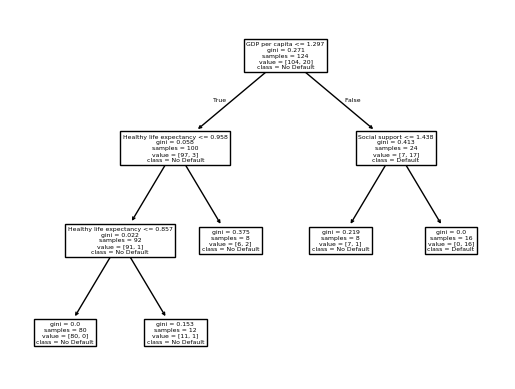

In [298]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# calculate median happiness score

world_happiness_2019['Above average happiness'] = world_happiness_2019['Score'] >= median_happiness_score

# split data into train and test

train, test = train_test_split(world_happiness_2019, test_size=0.2, random_state=0)

print(train.shape, test.shape)

# select features for training

features = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']

# create a tree model, experiment with parameters until you get optimal train and test accuracy
tree = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5)
tree.fit(train[features], train['Above average happiness'])


# fit the tree model with features 
score = tree.score(test[features], test['Above average happiness'])

print(score)

# accuracy on training set
train_accuracy = tree.score(train[features], train['Above average happiness'])

# accuracy on test set
test_accuracy = tree.score(test[features], test['Above average happiness'])

print(f"Training Accuracy: {train_accuracy:.4f}")
# training Accuracy: 0.9677
print(f"Test Accuracy: {test_accuracy:.4f}")
# test Accuracy: 0.9375

# use plot_tree method to visualise data
plot_tree(tree, feature_names=features, class_names=['No Default', 'Default'])

print("Using a Decision Tree Classifier, I achieved high accuracy (93.75%), which indicates that we can effectively\npredict whether a country falls above or below the median happiness score based on a combination of factors:\nGDP per capita, Social support, Healthy life expectancy, and Freedom to make life choices.")



2️⃣ What's the best single predictor for a country's happiness score?

In [299]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

# split data into train and test

train, test = train_test_split(world_happiness_2019, test_size=0.2, random_state=0)

display(world_happiness_2019.head())

# create the linear regression model

model = LinearRegression()

# list of features to test as potential predictors of happiness

features = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'GDP plus social support']

# dictionaries to store RMSE values for each feature

train_test_rmse_avgs = {}
train_test_rmse_diffs = {}

# loop through each feature and fit a regression model

for feature in features:
    model.fit(train[[feature]], train['Score'])

    # make predictions on both training and test sets
    train_preds = model.predict(train[[feature]])
    test_preds = model.predict(test[[feature]])
    train_error = mean_squared_error(train['Score'], train_preds)
    test_error = mean_squared_error(test['Score'], test_preds)

    # calculate the root mean squared error (RMSE) for train and test sets
    train_error = root_mean_squared_error(train['Score'], train_preds)
    test_error = root_mean_squared_error(test['Score'], test_preds)

    # store the average RMSE and train-test RMSE difference
    train_test_rmse_avgs[feature] = (train_error + test_error) / 2
    train_test_rmse_diffs[feature] = abs(train_error - test_error)
    print(f"Train error for {feature}: {train_error}\n Test_error for {feature}: {test_error}\n")

# identify best single predictor (lowest RMSE)
lowest_rmse = [feature for feature in features if train_test_rmse_avgs[feature] == min(train_test_rmse_avgs.values())]

# identify best-generalising feature, ie. performs best on new/unseen dataa (smallest RMSE difference while maintaining lower than average RMSE)
sorted_rmse_diffs = sorted(train_test_rmse_diffs.values())
smallest_rmse_difference = [feature for feature in features if train_test_rmse_diffs[feature] < sorted_rmse_diffs[int(len(sorted_rmse_diffs)/2)] and train_test_rmse_avgs[feature] < 1]

# print final conclusions
print(f"The best single indicator for a country's happiness score:\n1) {lowest_rmse} - this feature has the lowest prediction error, meaning it is the most reliable predictor of happiness.\n2){smallest_rmse_difference} - this feature has the smallest difference between train and test errors while maintaing a below-average prediction error score, \nmeaning it performs consistently on unseen data.")






,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,GDP plus social support,Above average happiness
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2.927,True
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2.956,True
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,3.070,True
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,3.004,True
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2.918,True


Train error for GDP per capita: 0.6367939554020549
 Test_error for GDP per capita: 0.8059349344414688

Train error for Social support: 0.6836287422194746
 Test_error for Social support: 0.7577737640082066

Train error for Healthy life expectancy: 0.7044826457592839
 Test_error for Healthy life expectancy: 0.6561254651422179

Train error for Freedom to make life choices: 0.8743715156948485
 Test_error for Freedom to make life choices: 1.069809296760652

Train error for Generosity: 1.1142151306536656
 Test_error for Generosity: 1.0794594844710916

Train error for Perceptions of corruption: 1.0171193705304062
 Test_error for Perceptions of corruption: 1.0559065793571352

Train error for GDP plus social support: 0.5735965725783748
 Test_error for GDP plus social support: 0.7119032144255041

The best single indicator for a country's happiness score:
1) ['GDP plus social support'] - this feature has the lowest prediction error, meaning it is the most reliable predictor of happiness.
2)['Heal

3️⃣  Can we predict a country's continent based on its data?

In [301]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# encode the 'Continent' column into numerical values for classification (not strictly required for KNN but best practice)

label_encoder = LabelEncoder()
merged_df['Continent_encoded'] = label_encoder.fit_transform(merged_df['Continent'])

# show the first few rows to verify encoding

display(merged_df.head())

# split data into training and test sets

train, test = train_test_split(merged_df, test_size=0.2, random_state=0)

# select features for training the KNN model

X_train = train[['Score', 'GDP per capita', 'Social support', 'Perceptions of corruption']]
y_train = train['Continent_encoded']
X_test = test[['Score', 'GDP per capita', 'Social support', 'Perceptions of corruption']]
y_test = test['Continent_encoded']

# create and train a KNN classifier - after experimenting, k=4 neighbours was optimal 

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# evaluate accuracy on both training and test sets

train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)

# print final accuracy results in a structured format

print(f"Using a KNN classifier (k=4), the model predicts a country's continent based on happiness factors.\n"
      f"Train Accuracy: {train_accuracy:.2f}\n"
    #   0.72
      f"Test Accuracy: {test_accuracy:.2f}")
    #   0.71



,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent,Continent_encoded
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe,2
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Europe,2
2,Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe,2
3,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Europe,2
4,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Europe,2


Using a KNN classifier (k=4), the model predicts a country's continent based on happiness factors.
Train Accuracy: 0.72
Test Accuracy: 0.71
